# Import des packages

In [1]:
import pyvista as pv
import pandas as pd
import numpy as np
import pygmsh
import os

# Lecture des fichiers météorologiques

Ci-dessous vous trouverez une fonction permettant de lire le fichier epw à partir de son chemin.

In [4]:
def read_epw(path):
    nombre_lignes_en_tete=8
    columns=['Year', 'Month', 'Day', 'Hour', 'Minute', 'Data Source and Uncertaintly Flags',
    'Dry Bulb Temperature', 'Dew Point Temperature', 'Relative Humidity',
    'Atmospheric Station Pressure', 'Extraterrestrial Horizontal Radiation',
    'Extraterrestrial Direct Normal Radiation', 'Horizontal Infrared Radiation Intensity',
    'Global Horizontal Radiation',  'Direct Normal Radiation',  'Diffuse Horizontal Radiation',
    'Global Horizontal Illuminance', 'Direct Normal Illuminance', 'Diffuse Horizontal Illuminance',
    'Zenith Luminance', 'Wind Direction',   'Wind Speed',   'Total Sky Cover',
    'Opaque Sky Cover', 'Visibility',   'Ceiling Height',   'Present Weather Observation',
    'Present Weather Codes',    'Precipitable Water',   'Aerosol Optical Depth',
    'Snow Depth',   'Days Since Last Snowfall', 'Albedo',
    'Liquid Precipitation Depth',   'Liquid Precipitation Quantity']
    
    data_meteo=pd.read_csv(path, sep=",", skiprows = nombre_lignes_en_tete, header=None)
    data_meteo.columns=columns
    
    debut=str(data_meteo.iloc[0]['Year'])+'-'+str(data_meteo.iloc[0]['Month'])+'-'+str(data_meteo.iloc[0]['Day'])
    fin=str(data_meteo.iloc[-1]['Year'])+'-'+str(data_meteo.iloc[-1]['Month'])+'-'+str(data_meteo.iloc[-1]['Day'])
    
    hours_in_year=pd.date_range(debut, fin+' T23:00', freq='H')
    
    data_meteo.index=hours_in_year
    data_meteo=data_meteo.drop(['Data Source and Uncertaintly Flags'], axis=1)
    
    return data_meteo

In [5]:
chemin_meteo = r"D://ENS_PS-hour.epw"#remplir ici
data_meteo = read_epw(chemin_meteo)

Exercice:  
1- Tracer les évolutions de températures au cours de l'année  
2- Tracer la rose des vents

<Axes: >

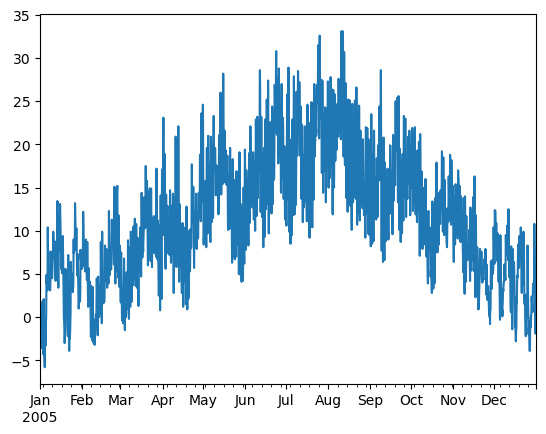

In [10]:
#Corrigé 1


[Text(0.0, 0, 'E'),
 Text(0.7853981633974483, 0, 'N-E'),
 Text(1.5707963267948966, 0, 'N'),
 Text(2.356194490192345, 0, 'N-O'),
 Text(3.141592653589793, 0, 'O'),
 Text(3.9269908169872414, 0, 'S-O'),
 Text(4.71238898038469, 0, 'S'),
 Text(5.497787143782138, 0, 'S-E')]

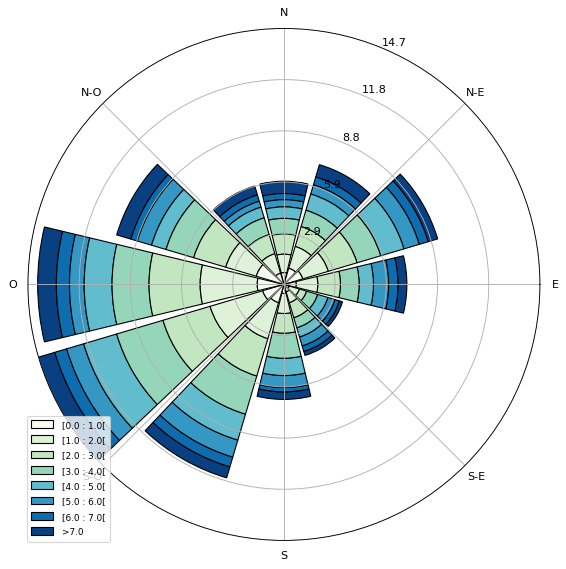

In [11]:
#Corrigé 2


# Visualisation de la géométrie et de son environnement

In [141]:
#Lecture des géométries pour visualisation

env = pv.read("Cas1/geometries/env.stl")
bati = pv.read("Cas1/geometries/walls.stl")
fen = pv.read("Cas1/geometries/windows.stl")


In [143]:
# # long example
plotter = pv.Plotter(notebook=True)
plotter.add_mesh(bati,"grey",label="batiment")
plotter.add_mesh(fen,"cyan",label="fenetres")
plotter.add_mesh(env,"orange",label="env")

plotter.add_legend()
plotter.show(jupyter_backend='trame')

#DEV:pour plus tard ajouter le nord

Widget(value='<iframe src="http://localhost:62737/index.html?ui=P_0x1ad92ffa260_1&reconnect=auto" class="pyvis…

## Lancement d'un cas energyplus

Pour executer Energyplus en ligne de commande python, il suffit d'utiliser les lignes suivantes

In [20]:
from eppy import modeleditor
from eppy.modeleditor import IDF

iddfile=r"C:\EnergyPlusV9-4-0\Energy+.idd"

IDF.setiddname(iddfile)

adresse = r"D://"
fichier_epw = adresse+"ENS_PS-hour.epw"
input_file = "BE_ENS_vn_temp16.idf"
output_dir = adresse + input_file.replace(".idf","")
#%% lancer simulation d'origine
#help(IDF.run)
idf_a_simuler = IDF(input_file,fichier_epw)
idf_a_simuler.run(output_directory=output_dir)

## Analyse des résultats

<Axes: >

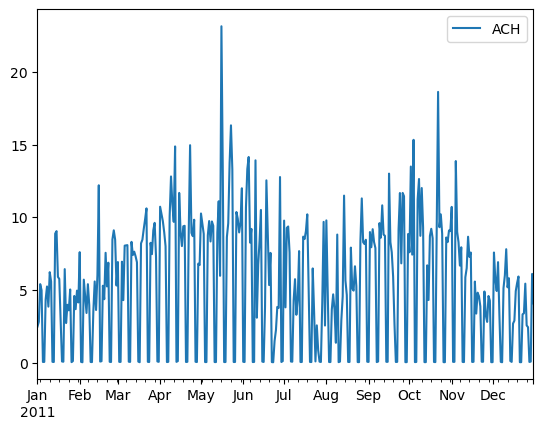

In [24]:
import esoreader
import matplotlib.pyplot as plt

tx_renouvel = pd.DataFrame(index=pd.date_range(start="01/01/2011", end="12/31/2011 23:00", freq="H"))

dd, data = esoreader.read(output_dir+"/"+"eplusout.eso")  
idx = dd.index[('Hourly','ATRIUM:ZONE1', 'AFN Zone Infiltration Air Change Rate')]
#La commande "dd.find_variable("Infiltration")" permet de repérer les sorties liées aux infiltrations.
#La liste des sorties est présente dans l'entête du fichier eplusout.eso

ts_atrium_temp = data[idx]
tx_renouvel["ACH"]=ts_atrium_temp

#heatmap - direction de vent vs vitesse
tx_renouvel.resample("D").mean().plot()

## Modifier un paramètre
voir https://eppy.readthedocs.io/en/latest/Main_Tutorial.html

## La ventilation naturelle dans DesignBuilder/EnergyPlus

pour en savoir plus: https://www.batisim.net/aide/index.html?temperatures_consignes_ventila.htm

Exercice: 

1- Lancer les simulations du batiment sans ventilation naturelle:
* version par défaut avec les cps
* version avec les cps obtenus de la CFD
   
2- Comparer les résultats (témpérature et taux de renouvellement d'air). Commenter?

Exercice:
1- Faire de même avec de la ventilation naturelle. Pensez à appliquer:
-un planning
-une température de consigne
-une ouverture même légère aux ouvrants (on pourra considérer une ouverture similaire sur toutes les fenêtres)

2- Comparer les résultats en filtrant sur les périodes de ventilation naturelle

In [ ]:
Quel est l'influence du nombre de directions discrétisées sur la prédiction? à partir du fichier à 36 directions réduire selon les diviseurs de 36 et conclure

En réalisant une étude paramétrique sur le taux d'ouverture des fenêtres et la consigne de température, estimer comment est influencé le renouvellement d'air des différentes zones.

Repérer quelle condition de vent génère le plus d'écart? quelle condition de vent génère le plus de renouvellement?

In [ ]:
#tracé la rose des débits?

In [ ]:
#evaluer l'influence pour 36 directions, =2*3*2*3 = 1 2 3 4 6 9 12 18 36

In [ ]:
#faire varier la température de consigne
#faire varier le taux d'ouverture des ouvrants
#mettre un planning de nuit

et la température dans tout ça?